In [1]:
import os
import sys
import pandas
import matplotlib.pyplot as plt

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

import pyolin
from pyolin.dataframe import GateData
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import score_heatmap
from pyolin.analysis import compatibility_heatmap
from pyolin.analysis import filter_valid
from pyolin.analysis import score_table
from pyolin.analysis import similarity_table
from pyolin.analysis import compatibility_table
from pyolin.analysis import all_paths

## Creating Gates from DataFrames

Gate objects can be created from a pandas DataFrame, as long as the expected columns are present. For example inspect the DataFrame used for the study by running the next cell.

In [2]:
dataframe = pandas.read_csv("../dataset.csv")
dataframe

,Unnamed: 0,strain,plasmid,backbone,iptg,rrpu
0,0,KT2440,1201,pSeva221,1,0.026556
1,1,KT2440,1201,pSeva221,5,0.004734
2,2,KT2440,1201,pSeva221,10,0.006434
3,3,KT2440,1201,pSeva221,20,0.016593
4,4,KT2440,1201,pSeva221,30,0.000000
...,...,...,...,...,...,...
1881,1881,KT2440,Srpr_s4,pSeva251,100,0.220476
1882,1882,KT2440,Srpr_s4,pSeva251,200,0.192586
1883,1883,KT2440,Srpr_s4,pSeva251,500,0.154987
1884,1884,KT2440,Srpr_s4,pSeva251,1000,0.113096


The strain, plasmid, backbone, iptg and rrpu columns are important. The iptg and rrpu columns are the input and output values of the gate characterisation, though these column names are customisable (see the code for the GateData constructor). 

It is also required that data for the input, autoflouresence and standardisation plasmids are present. For these, the plasmid column should contain 1818, 1201 and 1717 respectively.

The Gate are actually created using the following line.

In [3]:
gates = GateData(dataframe)

## Creating Gates from CSV

For convenience, a function is also provided for creating Gate objects from a .csv file.

In [4]:
gates = GateData.from_csv('../dataset.csv')

## Selecting Gates

Individual gates can be selected by specifying a strain, backbone or plasmid as follows

In [5]:
mygate = gates['DH5alpha':'pAN':'Amer_f1']
mygate

DH5alpha_pAN_Amer_f1

Groups of gates can be selected by omitting one or more of the parameters as follows

In [6]:
all_amer = gates[::'Amer_f1']
print(all_amer)

[CC118Lpir_pSeva221_Amer_f1, CC118Lpir_pSeva231_Amer_f1, DH5alpha_pAN_Amer_f1, DH5alpha_pSeva221_Amer_f1, KT2440_pSeva221_Amer_f1, KT2440_pSeva231_Amer_f1, KT2440_pSeva251_Amer_f1]


In [7]:
all_DH5_pAN = gates['DH5alpha':'pAN':]
print(all_DH5_pAN)

[DH5alpha_pAN_Amer_f1, DH5alpha_pAN_Amtr_a1, DH5alpha_pAN_Beti_e1, DH5alpha_pAN_Bm3r1_b1, DH5alpha_pAN_Bm3r1_b2, DH5alpha_pAN_Bm3r1_b3, DH5alpha_pAN_Hiyiir_h1, DH5alpha_pAN_Lcara_i1, DH5alpha_pAN_Litr_l1, DH5alpha_pAN_Lmra_n1, DH5alpha_pAN_Phif_p1, DH5alpha_pAN_Phif_p2, DH5alpha_pAN_Phif_p3, DH5alpha_pAN_Psra_r1, DH5alpha_pAN_Qacr_q1, DH5alpha_pAN_Qacr_q2, DH5alpha_pAN_Srpr_s1, DH5alpha_pAN_Srpr_s2, DH5alpha_pAN_Srpr_s3, DH5alpha_pAN_Srpr_s4]


## Inspecting Gates

Gates have many interesting properties. Look at pyolin/gate.py for the complete list. Here are a few examples.

### Plotting

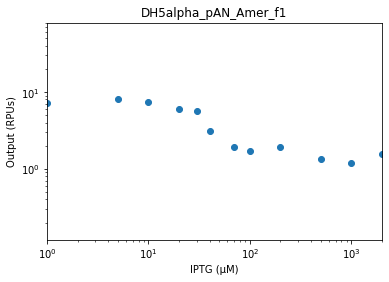

In [8]:
mygate.plot();

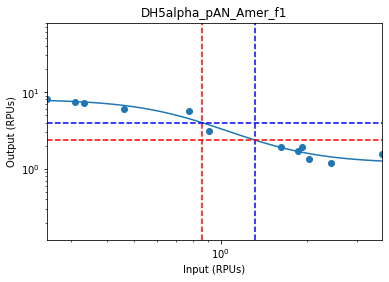

In [9]:
mygate.rpuplot();

### Fitting

The fitted hill function parameters are automatically computed when requested.

In [10]:
mygate.params

{'ymin': 1.1866559877375211,
 'ymax': 8.025482380223915,
 'K': 0.7585289492995914,
 'n': 2.8269478226205083}

or individually

In [11]:
mygate.n

2.8269478226205083

The hill function itself is also available, to do whatever you want with

In [18]:
half_expression = mygate.ymin + (mygate.ymax - mygate.ymin) / 2
print(half_expression)

mygate.hill_function(mygate.K)

4.606069183980718


4.606069183980718

Or simply

In [24]:
mygate(0.75)

4.660717767255013

### Compatibility

In [39]:
mygate.is_compatible_with(gates['DH5alpha':'pAN':'Beti_e1'])

False

In [40]:
gates['DH5alpha':'pAN':'Beti_e1'].is_compatible_with(mygate)

True

The margins for thresholds can also be accessed

In [41]:
mygate.il

0.8586791513334816

In [42]:
mygate.ol

2.3733119754750422

In [43]:
mygate.ih

1.3175528052851277

In [38]:
mygate.oh

4.012741190111957